In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_pickle('../../data/Top Fund Positioning/t10_full_universe_weights_20230731_v4.pkl')

df.head()

Security Name Ticker-Region  \
lionshares_id Symbol                                           
JUEMX-US      594918104  Microsoft Corporation       MSFT-US   
              037833100             Apple Inc.       AAPL-US   
              67066G104     NVIDIA Corporation       NVDA-US   
              023135106       Amazon.com, Inc.       AMZN-US   
              00287Y109           AbbVie, Inc.       ABBV-US   

                                    GICS Sector  \
lionshares_id Symbol                              
JUEMX-US      594918104  Information Technology   
              037833100  Information Technology   
              67066G104  Information Technology   
              023135106  Consumer Discretionary   
              00287Y109             Health Care   

                                                GICS Industry Name  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                                   Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104   Semiconductors & Semiconductor Equipment   
              023135106                           Broadline Retail   
              00287Y109                              Biotechnology   

                                                   GICS Industry Group  \
lionshares_id Symbol                                                     
JUEMX-US      594918104                            Software & Services   
              037833100                Technology Hardware & Equipment   
              67066G104       Semiconductors & Semiconductor Equipment   
              023135106   Consumer Discretionary Distribution & Retail   
              00287Y109  Pharmaceuticals Biotechnology & Life Sciences   

                                                 GICS Sub Industry  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                           Systems Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104                             Semiconductors   
              023135106                           Broadline Retail   
              00287Y109                              Biotechnology   

                        Region of Domicile   MSCI Country P_Country  \
lionshares_id Symbol                                                  
JUEMX-US      594918104      North America  United States        US   
              037833100      North America  United States        US   
              67066G104      North America  United States        US   
              023135106      North America  United States        US   
              00287Y109      North America  United States        US   

                            FF_Country  ...  Active Weight     Asset Type  \
lionshares_id Symbol                    ...                                 
JUEMX-US      594918104  UNITED STATES  ...       2.794198  Equity Common   
              037833100  UNITED STATES  ...      -1.532628  Equity Common   
              67066G104  UNITED STATES  ...       0.984061  Equity Common   
              023135106  UNITED STATES  ...       0.537960  Equity Common   
              00287Y109  UNITED STATES  ...       2.591077  Equity Common   

                         Asset Class      DATE  Fund Ticker          FFD_NAME  \
lionshares_id Symbol                                                            
JUEMX-US      594918104       Equity  20230731        JUEMX  JPMorgan Trust I   
              037833100       Equity  20230731        JUEMX  JPMorgan Trust I   
              67066G104       Equity  20230731        JUEMX  JPMorgan Trust I   
              023135106       Equity  20230731        JUEMX  JPMorgan Trust I   
              00287Y109       Equity  20230731        JUEMX  JPMorgan Trust I   

                        P_PRICE(0,USD)           aum bench_id Fund Brand  
lionshares_id Symbol                        

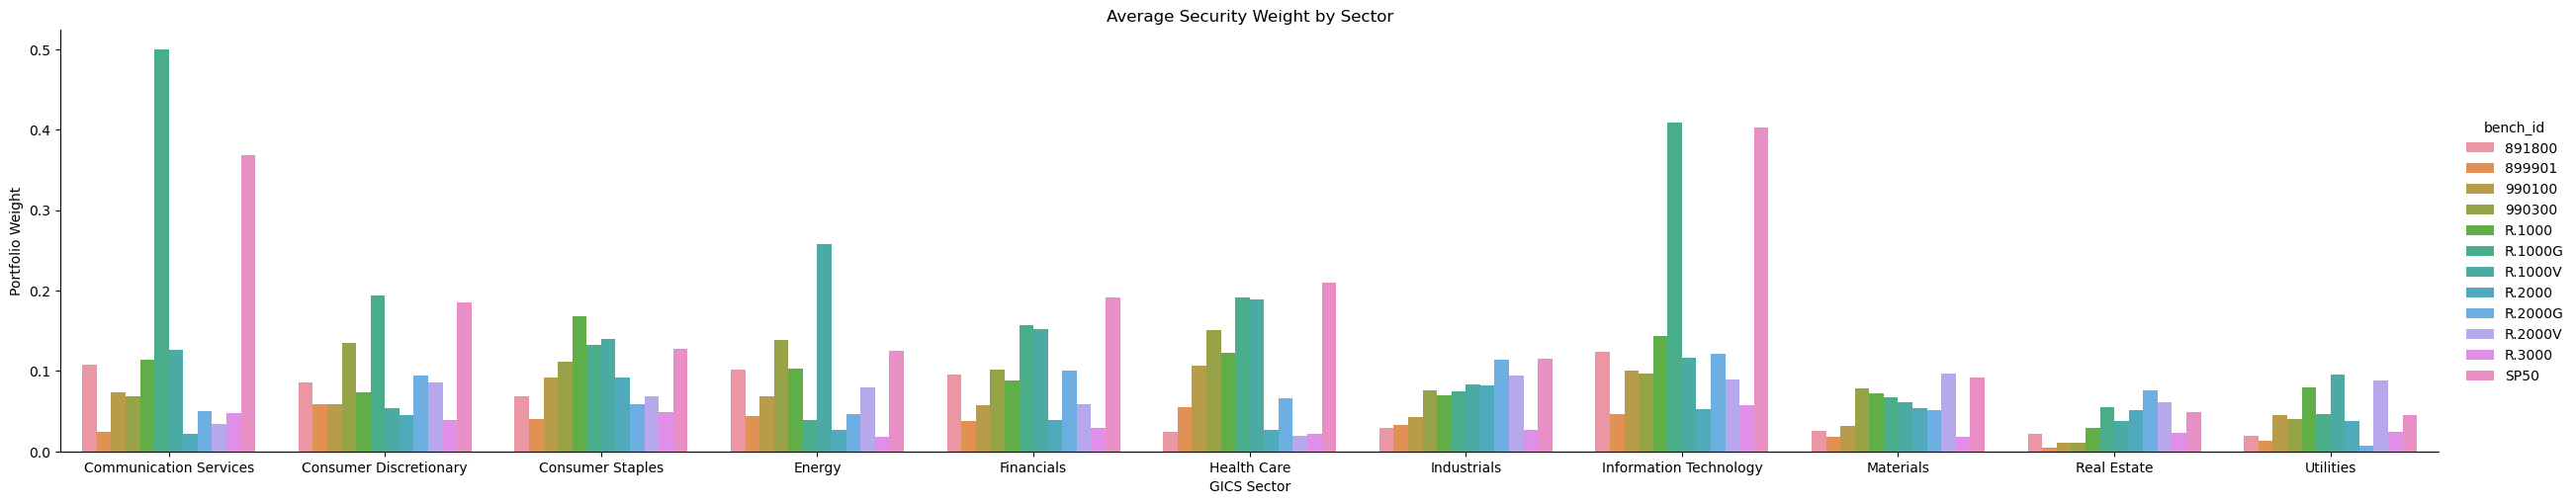

In [2]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Portfolio Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Portfolio Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Average Security Weight by Sector')
plt.show()

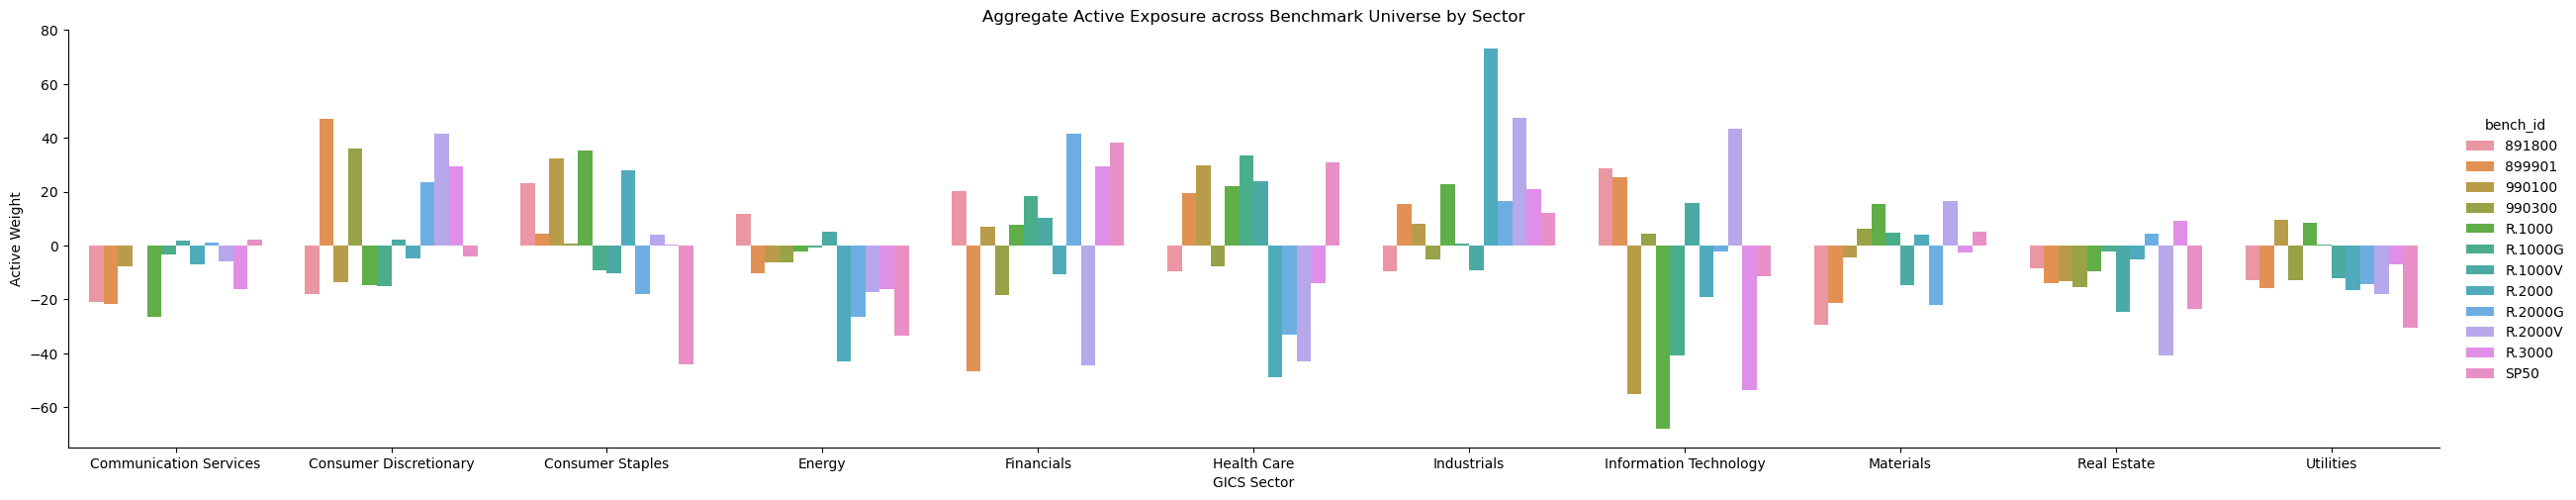

In [3]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'sum'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Aggregate Active Exposure across Benchmark Universe by Sector')
plt.show()

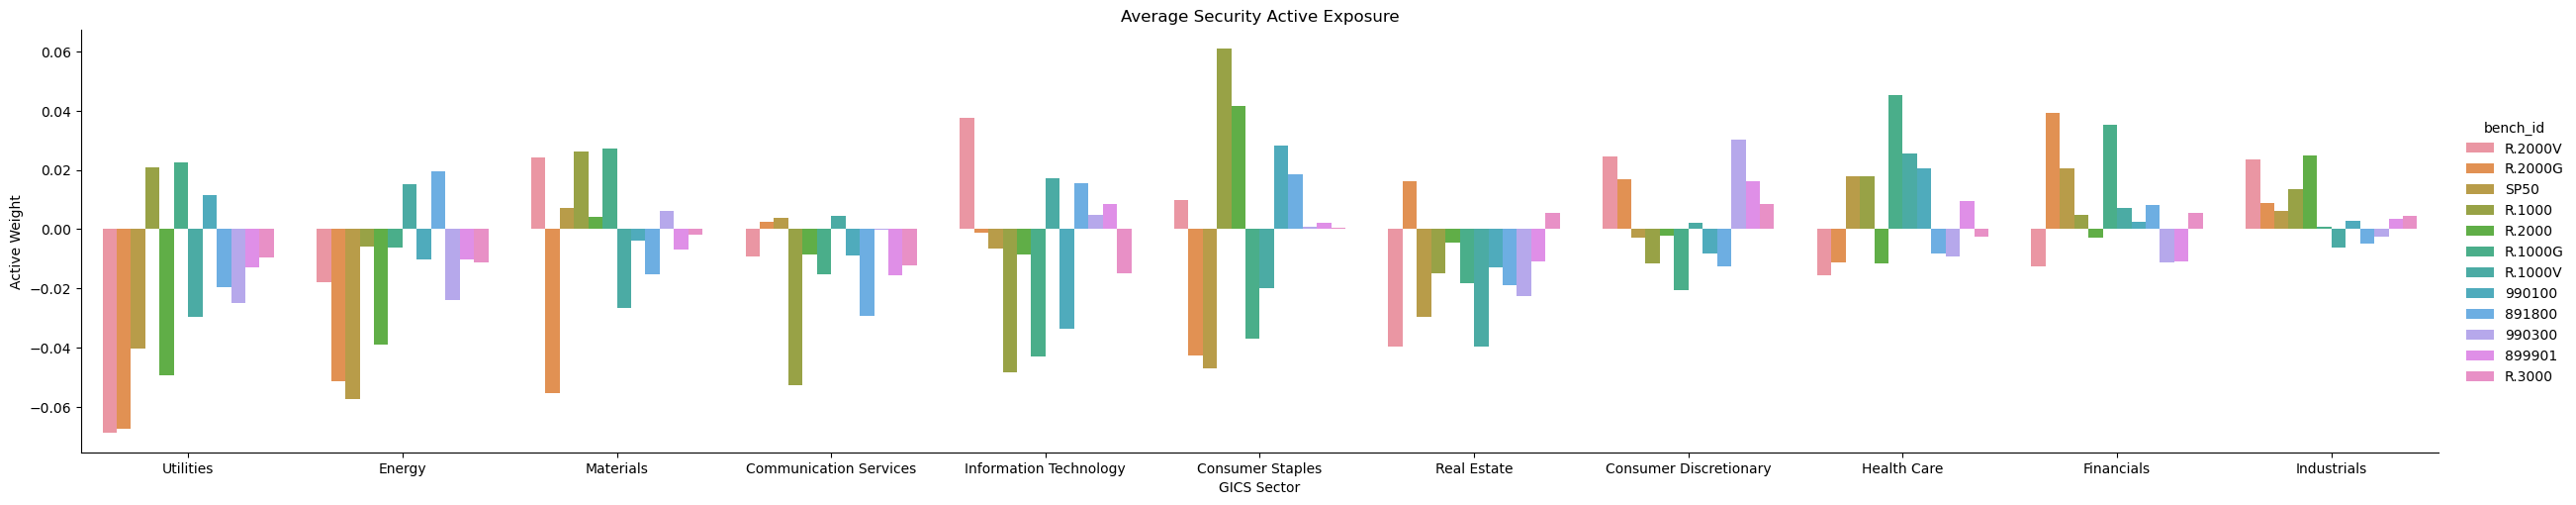

In [4]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).sort_values('Active Weight')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
        aspect = 5,
            )
plt.title('Average Security Active Exposure')
plt.show()

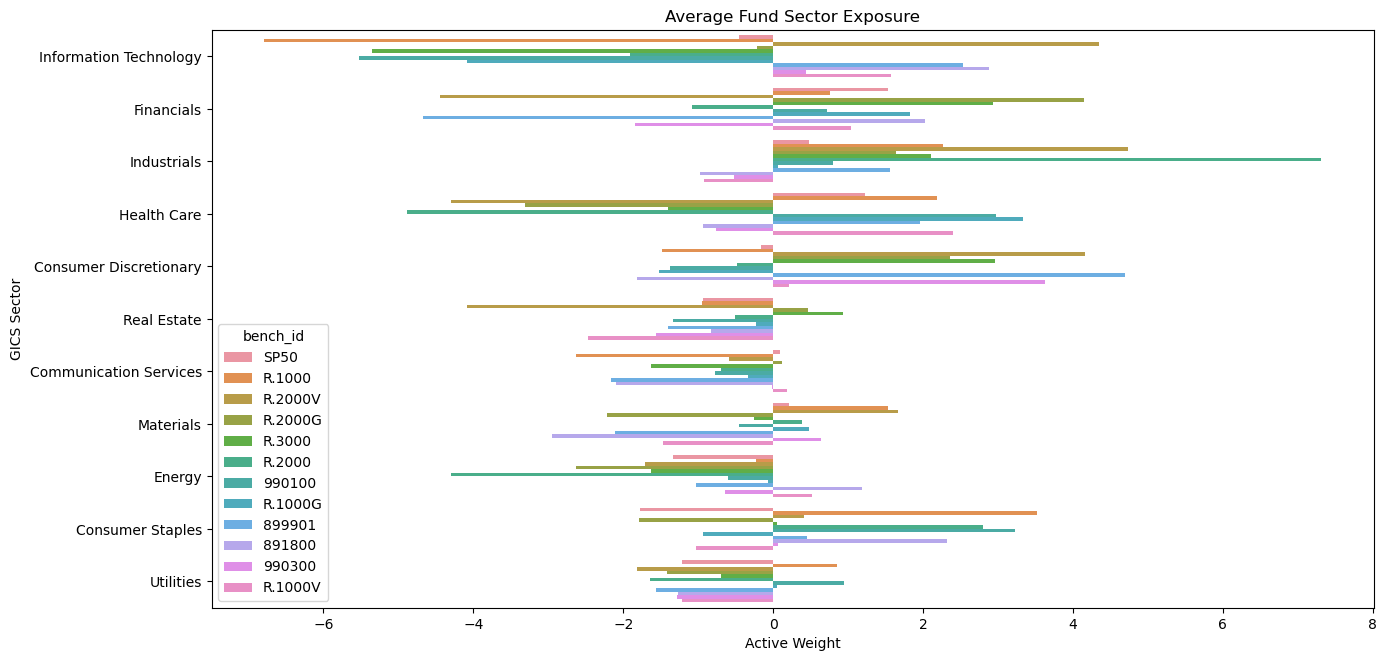

In [5]:
fig, axs = plt.subplots(figsize=(15,7.5))
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector','Fund Ticker']).agg({'Active Weight':'sum'}).sort_values('Active Weight')
sns.barplot(data=df_plot.reset_index(),
            y = 'GICS Sector',
            x = 'Active Weight',
            hue = 'bench_id',  
            errorbar=None,
            orient ='h'
            )
plt.title('Average Fund Sector Exposure')
plt.show()

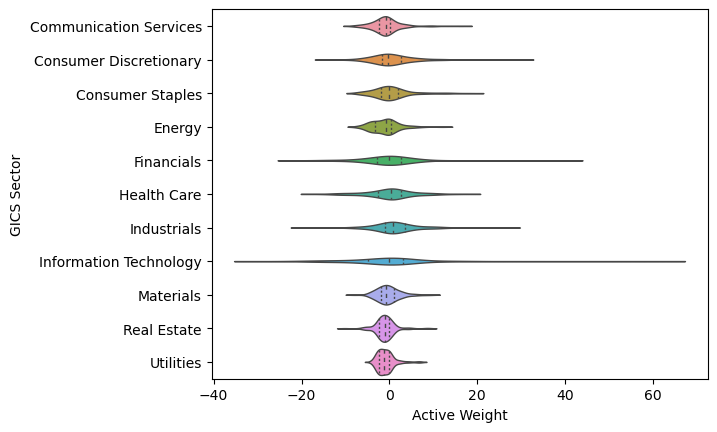

In [6]:
sns.violinplot(data=df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector','Fund Ticker']).agg({'Active Weight':'sum'}).reset_index(),y="GICS Sector", x="Active Weight",
               inner="quart", linewidth=1,orient ='h')
plt.show()

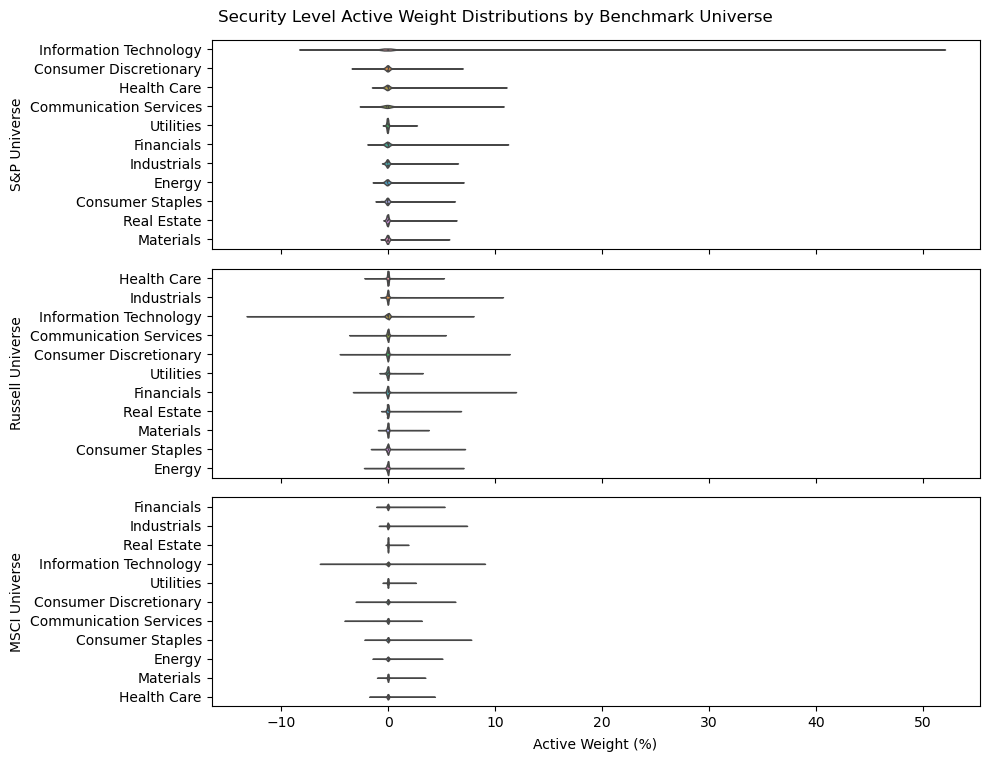

In [11]:
benchs = [('S&P',['SP50']),('Russell',['R.1000','R.1000G','R.1000V','R.2000','R.2000V','R.2000G','R.3000','R.MID']),('MSCI',['990300','892400','990100','899901','891800'])]
fig, axs = plt.subplots(len(benchs), 1,figsize=(10,7.5),sharex=True)  # Create subplots
dfb = df[df['GICS Sector']!="Other"]
# Iterate through each unique benchmark
for i, bench in enumerate(benchs): 
    sns.violinplot(data=dfb[dfb['bench_id'].isin(bench[1])].reset_index(), y="GICS Sector", x="Active Weight",
                   inner="quart", linewidth=1,orient ='h',ax=axs[i])
    axs[i].set_ylabel(f'{bench[0]} Universe')  # Set title for each subplot
    axs[i].set_xlabel('')

plt.suptitle("Security Level Active Weight Distributions by Benchmark Universe")
fig.text(0.6, -0, 'Active Weight (%)', ha='center', va='center') 
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Show the plots

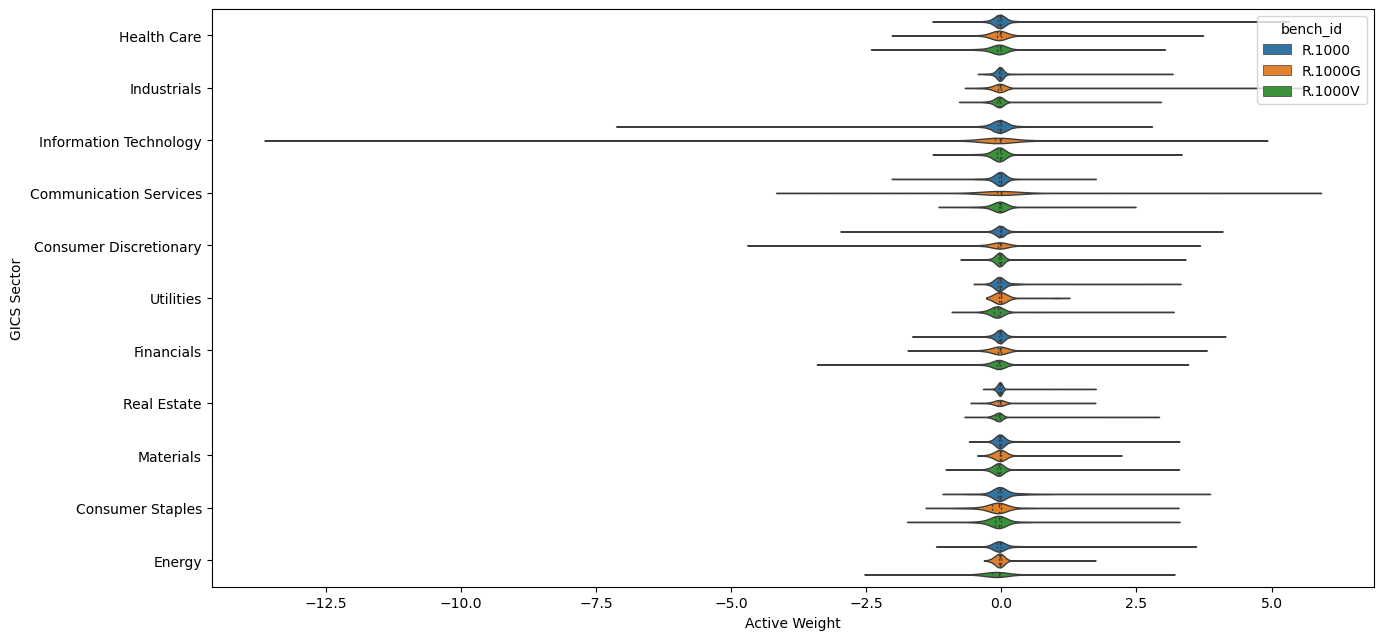

In [8]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.1000','R.1000G','R.1000V']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

In [12]:
df[df['Active Weight']>50]

,,Security Name,Ticker-Region,GICS Sector,GICS Industry Name,GICS Industry Group,GICS Sub Industry,Region of Domicile,MSCI Country,P_Country,FF_Country,...,Active Weight,Asset Type,Asset Class,DATE,Fund Ticker,FFD_NAME,"P_PRICE(0,USD)",aum,bench_id,Fund Brand
lionshares_id,Symbol,,,,,,,,,,,,,,,,,,,,,
MFRKX-US,037833100,Apple Inc.,AAPL-US,Information Technology,Technology Hardware Storage & Peripherals,Technology Hardware & Equipment,Technology Hardware Storage & Peripherals,North America,United States,US,UNITED STATES,...,51.336601,Equity Common,Equity,20230731,MFRKX,MFS Series Trust V,54.13,2.099414e+09,SP50,MFS


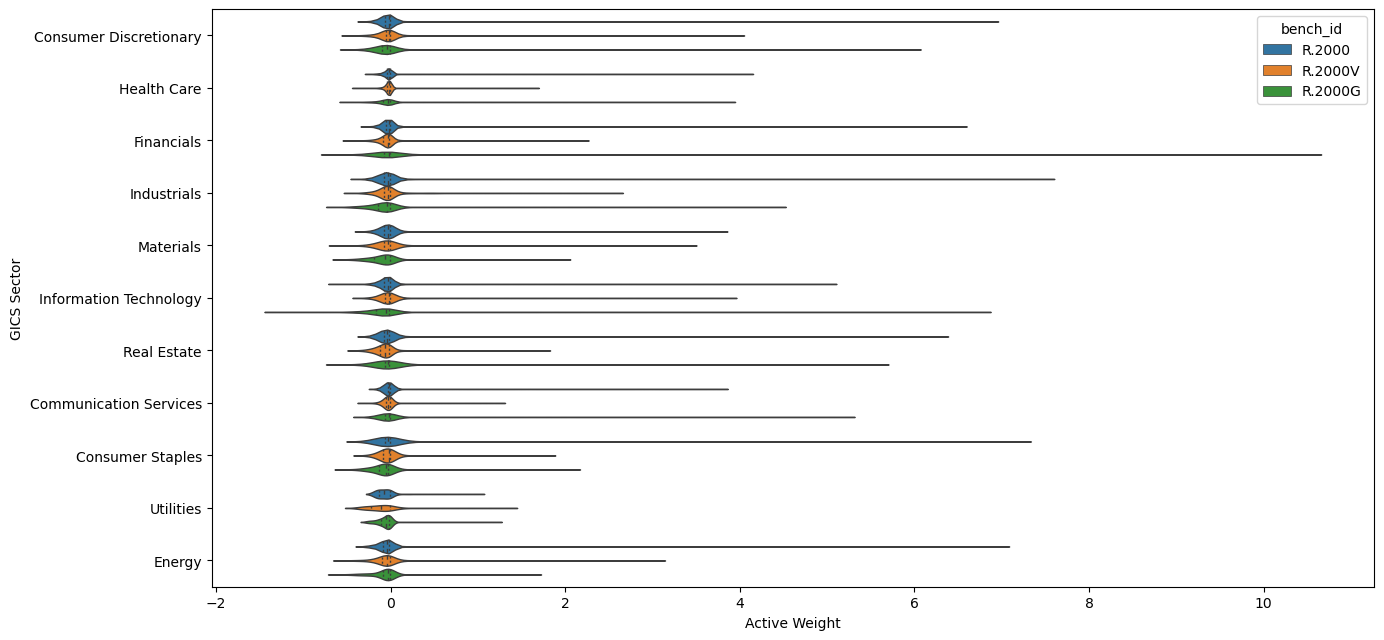

In [9]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.2000','R.2000V','R.2000G']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

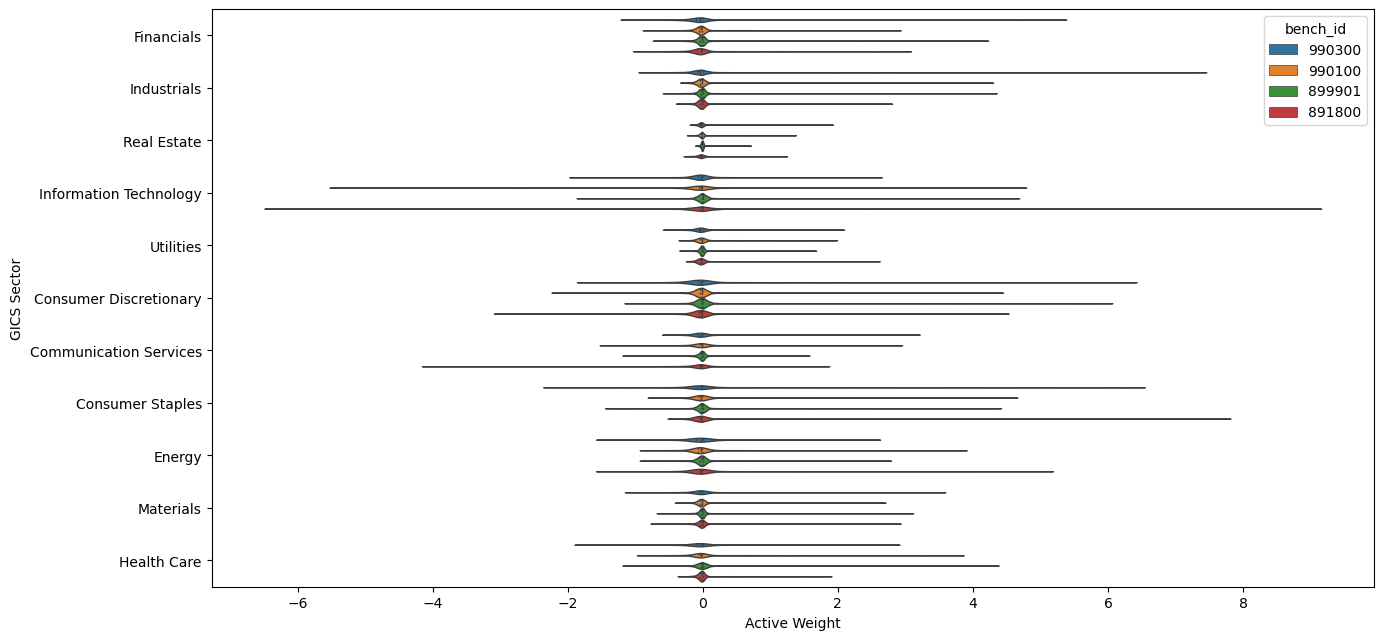

In [10]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

msci_benchs = ['990300','990100','899901','891800']
df_rus =df[df['bench_id'].isin(msci_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

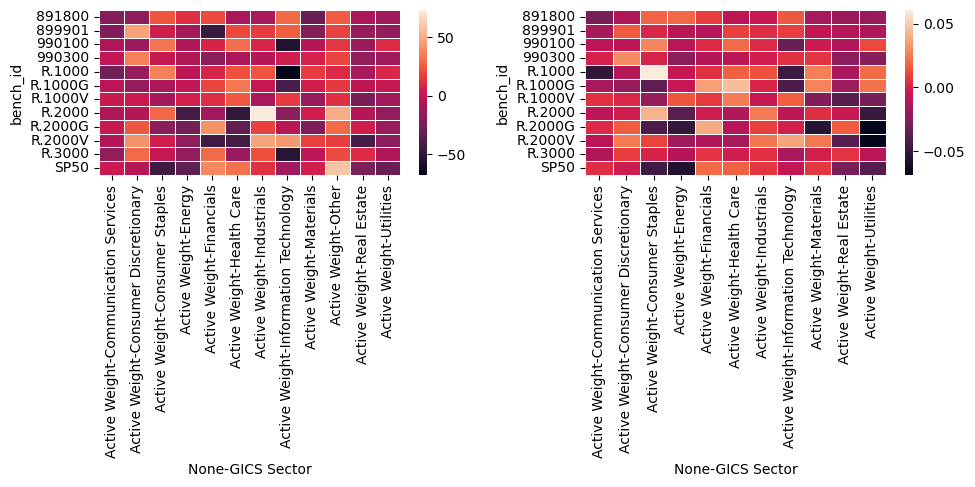

In [65]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(df.groupby(['bench_id','GICS Sector']).agg({'Active Weight':'sum'}).unstack(),
            linewidth=.5,ax=axs[0])

sns.heatmap(df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack(),
            linewidth=.5,ax=axs[1])

plt.tight_layout()

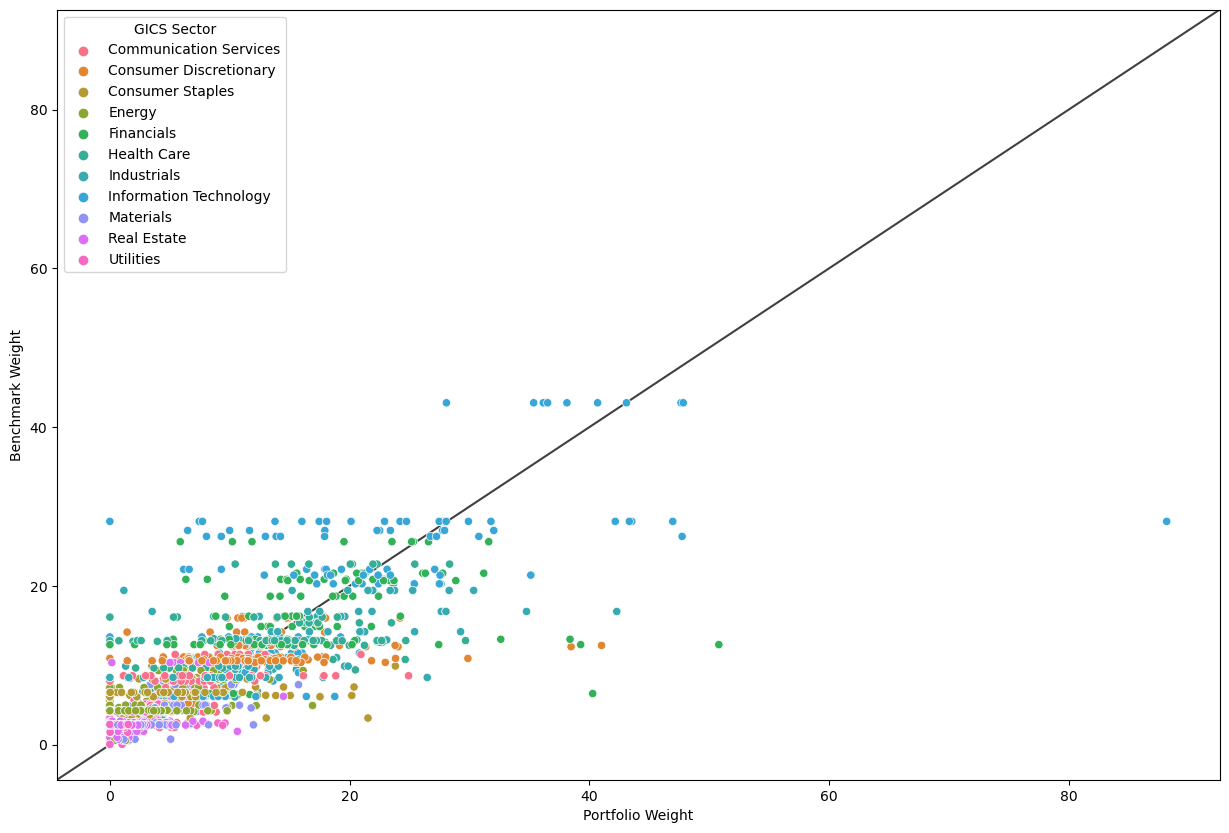

In [51]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(df[df['GICS Sector']!='Other'].groupby(['bench_id','Fund Ticker','GICS Sector']).agg({'Portfolio Weight':'sum',
'Benchmark Weight':'sum'}),
x = 'Portfolio Weight',
y = 'Benchmark Weight',
hue = 'GICS Sector')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against each other
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

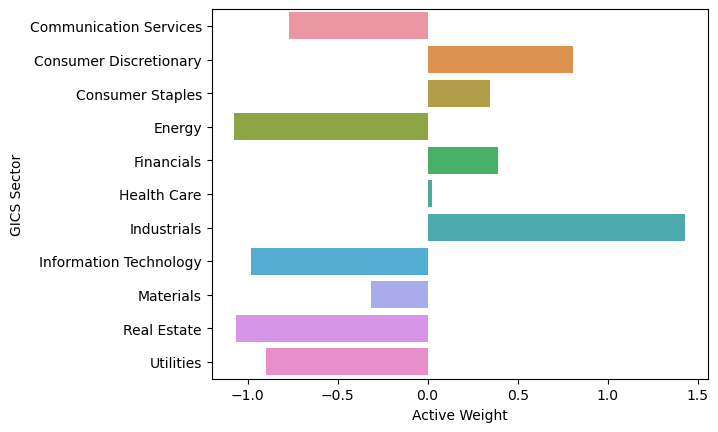

In [62]:
sns.barplot(df[df['GICS Sector']!='Other'].groupby(['bench_id','Fund Ticker','GICS Sector']).agg({'Active Weight':'sum'}).reset_index(),
orient = 'h',
x = 'Active Weight',
y = 'GICS Sector',errorbar=None)

plt.show()

In [ ]:
len(df['Fund Ticker'].unique())

In [37]:
df.groupby(['Fund Ticker','GICS Sector']).agg({'Active Weight':'sum'}).sort_values('Active Weight')

,,Active Weight
Fund Ticker,GICS Sector,
LLPFX,Information Technology,-28.128576
CFIMX,Information Technology,-20.675600
ALVIX,Information Technology,-20.497566
OAKLX,Information Technology,-20.404590
RYPNX,Financials,-19.696704
...,...,...
OAKLX,Financials,26.668366
LLINX,Consumer Discretionary,28.511149
BGRIX,Financials,33.836408
